<a href="https://colab.research.google.com/github/BrunoLoducca/Machine-Learning---Dados-com-Altas-Dimens-es/blob/main/Deep_Learning_Previs%C3%A3o_com_Keras%2C_parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

uri= "https://raw.githubusercontent.com/alura-cursos/deeptime/aula4/bicicletas.csv"
dados = pd.read_csv(uri)
dados.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

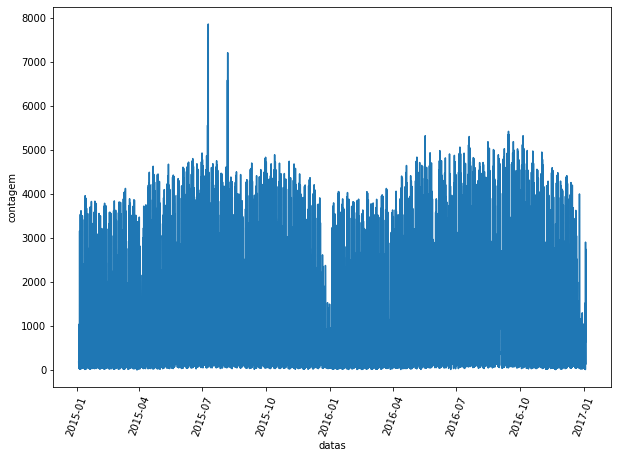

In [13]:
plt.figure(figsize=(10,7))

sns.lineplot(x="datas", y="contagem", data=dados)

#rotacionando as datas no gráfico para que não
# fiquem sobreescritas umas sob as outras. 
plt.xticks(rotation=70)


# Escalonando:

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Aqui está escalonando a informação apenas da contagem e, 
# por isso, eu treino apenas a contagem. Através do values
# estou pegando todos os valores de dados contagem e refazendo 
# a sua forma numa escala de -1 e 1. 
scaler.fit(dados["contagem"].values.reshape(-1,1))

# Transformando os dados da contagem com o scaler e os colocando
# numa escala de -1 e 1. 
y = scaler.transform(dados["contagem"].values.reshape(-1,1))

In [16]:
tamanho_treino = int(len(dados)*0.9)
tamanho_teste = len(dados) - tamanho_treino


In [19]:
# Definindo os tamanhos de y treino e teste, com base naquilo que foi escalonado.
y_treino = y[0:tamanho_treino]
y_teste = y[tamanho_treino:len(dados)]

In [34]:
print(y_treino[:, 0])

[-0.88574518 -0.9262953  -0.92998167 ... -0.9548647  -0.9548647
 -0.89403952]


In [37]:
data=dados[0:tamanho_treino]
data

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
15667,2016-10-23 03:00:00,217,8.0,7.0,90.0,6.0,2.0,0.0,1.0,2.0
15668,2016-10-23 04:00:00,150,8.0,7.0,93.0,6.0,2.0,0.0,1.0,2.0
15669,2016-10-23 05:00:00,107,8.0,8.0,87.0,4.0,3.0,0.0,1.0,2.0
15670,2016-10-23 06:00:00,107,8.0,7.0,90.0,6.5,3.0,0.0,1.0,2.0


In [ ]:
# Eu acho que y_treino[:,0] match com dados[0:tamanho_treino] por exemplo, 
# pois o primeiro passa todos os atributos em uma linha, assemlhando com os dados
# em cada coluna do dataframe acima. Se eu passase apenas y_treino, teria apenas uma coluna
# de dados e, assim, o data iria requerer apenas uma dimensão, e não muitas que estão presentes no dataframe. 

(array([735599., 735689., 735780., 735872., 735964., 736055., 736146.,
        736238., 736330.]), <a list of 9 Text major ticklabel objects>)

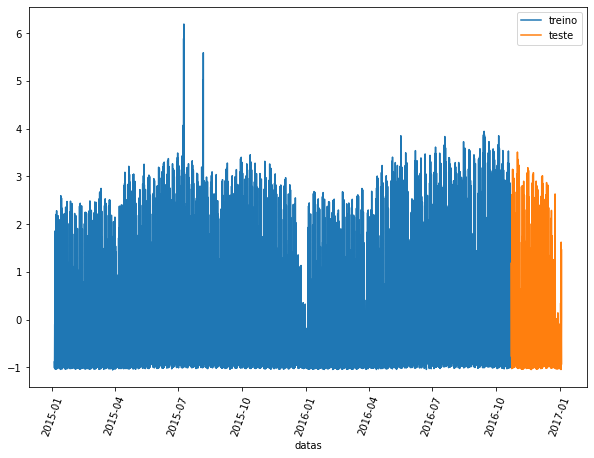

In [24]:
plt.figure(figsize=(10,7))

sns.lineplot(x="datas", y=y_treino[:,0], data=dados[0:tamanho_treino], label="treino")
sns.lineplot(x="datas", y=y_teste[:,0], data=dados[tamanho_treino:len(dados)], label="teste")

#rotacionando as datas no gráfico para que não
# fiquem sobreescritas umas sob as outras. 
plt.xticks(rotation=70)


# Criando uma função que separa os dados da contagem, pois esses servirão tanto para a entrada quanto para a saída. 

In [30]:
import numpy as np

# número de passos representa um atraso, por assim dizer, 
# usado para modificar os valores entre entrada e saída. 
def separando_dados(vetor,n_passos):
  x_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo) 
  return x_novo, y_novo

In [38]:
vetor = pd.DataFrame(y_treino)[0]

x_treino_novo, y_treino_novo = separando_dados(vetor, 10)


In [39]:
vetor2 = pd.DataFrame(y_teste)[0]

x_teste_novo, y_teste_novo = separando_dados(vetor2, 10)

# Rede neural recorrente:


In [ ]:
# Antes de iniciar com a rede, deve-se passar o conjunto dos dados conforme
# a rede espera receber. 

# Tanto x_treino_novo.shape[0] quanto x_teste_novo.shape[0] corresponde a primeira coluna
# dos dados provindos da função separando dados. Para a segunda coluna, tem-se o valor um no 
# lugar do número zero. 

x_treino_novo = x_treino_novo.reshape(x_treino_novo.shape[0], x_treino_novo.shape[1], 1)
x_teste_novo = x_teste_novo.reshape(x_teste_novo.shape[0], x_teste_novo.shape[1], 1)

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from tensorflow.keras.layers import LSTM

recorrente = Sequential()

# LSTM é um tipo de rede recorrente na qual passo 128 lupins com as entradas 
# 0 e 1, que representam as últimas dimensões do treino novo em x. 
recorrente.add(LSTM(128, input_shape=(x_treino_novo.shape[0], x_treino_novo.shape[1])))

recorrente.compile(loss="mean_squared_error", optimizer="RMSProp")

In [ ]:
# Faltou eu terminar o código. Porém a sua finalização perpassa em usar 
# essa rede neural recorrente no treinamento e previsão dos dados plotando 
# um gráfico semelhante à primeira parte e nada mais. 